# Project Idea

## Cap Recognizer
The goal of this project is to classify 13 different types of caps / headwears commonly worn around the world. The types are following: <br/>
- balaclava cap
- baseball cap
- beanie cap
- boater hat
- bowler hat
- bucket hat
- cowboy hat
- flat cap
- kepi cap
- taqiyah cap
- top hat
- turban cap
- visor cap

# Importing Libraries and Setting up Project Directory

In [1]:
# !pip install -Uqq fastai fastbook nbdev ddgs==9.5.4
!pip install -Uqq fastai fastbook nbdev ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [4]:
%cd /content/drive/MyDrive/2025_ALL_Master_Course_Works/ALL_DL_CV/CV-Project-1_Cap-Recognizer

/content/drive/MyDrive/2025_ALL_Master_Course_Works/ALL_DL_CV/CV-Project-1_Cap-Recognizer


# Download Images from Browser

## Download from DuckDuckGo Image (DDGS)

NB: DuckDuckGo Image (DDGS) worked well earlier times but currently it's not working as repeated images are being found in scraped images

More details about the `ddgs` library here: https://github.com/deedy5/ddgs

In [5]:
cap_labels = [
    "balaclava cap",
    "baseball cap",
    "beanie cap",
    "boater hat",
    "bowler hat",
    "bucket hat",
    "cowboy hat",
    "flat cap",
    "kepi cap",
    "taqiyah cap",
    "top hat",
    "turban cap",
    "visor cap"
]
len(cap_labels)

13

for more info, visit https://pypi.org/project/duckduckgo-search/

In [21]:
from ddgs import DDGS
import time

def DDG_search_images(term, min_images=100):
  """
  term: term we are searching for
  min_images: minimum number of images to be downloaded
  """
  results = []
  for page_no in range(1, 100): # continue to traverse pages until we get the target no of images
    responses = DDGS().images(
        query=term,
        region="us-en",
        safesearch="moderate", # filters out low-quality or NSFW content
        timelimit="m", # "m" = month, better relevance than "y"
        max_results=min_images,
        page = page_no,
        backend="auto"
    )
    results.extend(responses)
    if len(results) >= min_images: break

  image_urls = [result['image'] for result in results]
  return image_urls

In [22]:
# searching image of one category for test
images = DDG_search_images(cap_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 196 -- One Image URL => https://catalog-resize-images.thedoublef.com/fabeab257f4d1eb27a2d1780018d6de8/1400/1400/UBL01YAW01_R_DARKP-0099.b.jpg'

In [ ]:
doc(download_url)

In [ ]:
# testing download
dest = "sample balaclava cap.jpg"
download_url(images[0], dest, show_progress=False)

Path('sample balaclava cap.jpg')

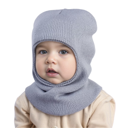

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

In [23]:
from tqdm.notebook import tqdm # helps keep track of the progress

data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for cap_type in tqdm(cap_labels):

  dest = f"{data_path}/{cap_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    cap_image_urls = DDG_search_images(cap_type)
    download_images(dest, urls = cap_image_urls)

  except:
    continue

  0%|          | 0/13 [00:00<?, ?it/s]

In [24]:
# - get_image_files(): This is a utility from the fastai library that scans a directory and returns a list of image file paths
# - data_path: This is the root folder pointing to folder path, in this case, it is pointing to "data" folder where all folders of cap labels are stored.

image_counts = get_image_files(data_path)
image_counts

(#1472) [Path('data/balaclava cap/f8b298c7-f627-4f35-a2a7-c553a9d6144f.jpg'),Path('data/balaclava cap/48ea7c86-39ed-4986-a45a-2580782cf671.jpg'),Path('data/balaclava cap/967d0b73-0ca0-40e3-b4b1-0a891e97c9e9.jpg'),Path('data/balaclava cap/a8b8fb75-03bd-4335-8c0b-86c92fb8c702.jpg'),Path('data/balaclava cap/5df98828-a263-41ed-9e29-be871aa7e52c.jpg'),Path('data/balaclava cap/6d276284-5626-461f-ac30-5a0b90b90c13.jpg'),Path('data/balaclava cap/7e8e5724-3b81-4efd-9e8a-7f3093ea9d13.jpg'),Path('data/balaclava cap/9dc69404-913f-40ca-9888-4704e9215c5f.jpg'),Path('data/balaclava cap/e2940aca-0dfc-4c0d-8cdf-45ac083a4e49.jpg'),Path('data/balaclava cap/2b052476-b1cc-4ca7-85e9-79ca8a5dec90.jpg'),Path('data/balaclava cap/e9aceedd-817b-4a23-9f9a-f753fe791828.jpg'),Path('data/balaclava cap/ce6ef604-6677-47e1-abc3-a02b889632de.jpg'),Path('data/balaclava cap/74d635a3-1047-49de-a651-6a85a616880e.jpg'),Path('data/balaclava cap/42a3cee9-45e1-430d-bcf5-0c1fccea1352.jpg'),Path('data/balaclava cap/6f9f82c6-77b2-

In [ ]:
doc(verify_images)

In [25]:
# finding images that can't be opened and putting them on failed
failed = verify_images(image_counts)
failed

(#5) [Path('data/kepi cap/c45e1bff-037a-43ce-8e35-8431fe0cf546.svg'),Path('data/top hat/8d517c8a-aac5-46f1-b092-0b6c76557010.png'),Path('data/visor cap/1d0c7abb-26f9-43cc-9759-f95d5a74c25d.jpg'),Path('data/visor cap/8e23d646-9bdf-49ac-93b2-045228e6d666.jpg'),Path('data/visor cap/95fcf87d-db42-44f2-8dcc-41dcfdde8a39.jpg')]

In [26]:
# - failed: This should be a list-like object containing paths to files you want to delete—typically corrupted or invalid image files.
# - .map(...): This is FastAI’s version of Python’s map(), but applied to its L class (a smarter list). It applies a function to each item in the list.
# - Path.unlink: This deletes a file from disk. It’s like calling .remove() or os.remove() but cleaner with Pathlib.

failed.map(Path.unlink)

(#5) [None,None,None,None,None]

In [27]:
# images after cleaning
get_image_files(data_path)

(#1467) [Path('data/balaclava cap/f8b298c7-f627-4f35-a2a7-c553a9d6144f.jpg'),Path('data/balaclava cap/48ea7c86-39ed-4986-a45a-2580782cf671.jpg'),Path('data/balaclava cap/967d0b73-0ca0-40e3-b4b1-0a891e97c9e9.jpg'),Path('data/balaclava cap/a8b8fb75-03bd-4335-8c0b-86c92fb8c702.jpg'),Path('data/balaclava cap/5df98828-a263-41ed-9e29-be871aa7e52c.jpg'),Path('data/balaclava cap/6d276284-5626-461f-ac30-5a0b90b90c13.jpg'),Path('data/balaclava cap/7e8e5724-3b81-4efd-9e8a-7f3093ea9d13.jpg'),Path('data/balaclava cap/9dc69404-913f-40ca-9888-4704e9215c5f.jpg'),Path('data/balaclava cap/e2940aca-0dfc-4c0d-8cdf-45ac083a4e49.jpg'),Path('data/balaclava cap/2b052476-b1cc-4ca7-85e9-79ca8a5dec90.jpg'),Path('data/balaclava cap/e9aceedd-817b-4a23-9f9a-f753fe791828.jpg'),Path('data/balaclava cap/ce6ef604-6677-47e1-abc3-a02b889632de.jpg'),Path('data/balaclava cap/74d635a3-1047-49de-a651-6a85a616880e.jpg'),Path('data/balaclava cap/42a3cee9-45e1-430d-bcf5-0c1fccea1352.jpg'),Path('data/balaclava cap/6f9f82c6-77b2-

## Download Images Using Bing

It's the most efficient and easiest way to scrape images right now to me

In [ ]:
cap_labels = [
    "balaclava cap",
    "baseball cap",
    "beanie cap",
    "boater hat",
    "bowler hat",
    "bucket hat",
    "cowboy hat",
    "flat cap",
    "kepi cap",
    "taqiyah cap",
    "top hat",
    "turban cap",
    "visor cap"
]
len(cap_labels)

In [19]:
!pip install bing-image-downloader

In [20]:
from bing_image_downloader import downloader

# created "dataset" folder to store data
# downloading 100 image per category/label

for label in cap_labels:
    downloader.download(label, limit=100, output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60)

Streaming output truncated to the last 5000 lines.
[%] File Downloaded !

[%] Downloading Image #10 from https://images-na.ssl-images-amazon.com/images/I/71Z8gG6Ab2L._AC_UL1500_.jpg
[%] File Downloaded !

[%] Downloading Image #11 from https://cdn.shopify.com/s/files/1/1643/5313/articles/A1001_2000x.jpg?v=1639524814
[%] File Downloaded !

[%] Downloading Image #12 from https://i.pinimg.com/originals/37/a8/af/37a8afebcd3bba9a4d300605b617cc89.jpg
[%] File Downloaded !

[%] Downloading Image #13 from https://clipartix.com/wp-content/uploads/2019/02/cowboy-hat-transparent-2019-29.png
[%] File Downloaded !

[%] Downloading Image #14 from https://i.etsystatic.com/15881772/r/il/28351a/1755055956/il_fullxfull.1755055956_su3a.jpg
[%] File Downloaded !

[%] Downloading Image #15 from https://i5.walmartimages.com/asr/303e2aa4-2f99-44a9-8072-fb9b94e45e6f_1.363f5c72d1b5af6f149eb5b1d8023861.jpeg
[%] File Downloaded !

[%] Downloading Image #16 from https://natedsanders.com/ItemImages/000027/46964_lg

In [26]:
# - get_image_files(): This is a utility from the fastai library that scans a directory and returns a list of image file paths
# - data_path: This is the root folder pointing to folder path, in this case, it is pointing to "dataset" folder where all folders of cap labels are stored.
data_path = "dataset"
image_counts = get_image_files(data_path)
image_counts

(#1264) [Path('dataset/balaclava cap/Image_1.jpg'),Path('dataset/balaclava cap/Image_2.jpg'),Path('dataset/balaclava cap/Image_3.jpg'),Path('dataset/balaclava cap/Image_4.jpg'),Path('dataset/balaclava cap/Image_5.jpg'),Path('dataset/balaclava cap/Image_6.jpg'),Path('dataset/balaclava cap/Image_7.jpg'),Path('dataset/balaclava cap/Image_8.jpg'),Path('dataset/balaclava cap/Image_9.jpg'),Path('dataset/balaclava cap/Image_10.jpg'),Path('dataset/balaclava cap/Image_11.jpg'),Path('dataset/balaclava cap/Image_12.jpg'),Path('dataset/balaclava cap/Image_13.jpg'),Path('dataset/balaclava cap/Image_14.jpg'),Path('dataset/balaclava cap/Image_15.jpeg'),Path('dataset/balaclava cap/Image_16.jpg'),Path('dataset/balaclava cap/Image_17.jpg'),Path('dataset/balaclava cap/Image_18.jpg'),Path('dataset/balaclava cap/Image_19.jpg'),Path('dataset/balaclava cap/Image_20.jpg')...]

In [27]:
# finding images that can't be opened and putting them on failed
failed = verify_images(image_counts)
failed

(#0) []

In [28]:
# - failed: This should be a list-like object containing paths to files you want to delete—typically corrupted or invalid image files.
# - .map(...): This is FastAI’s version of Python’s map(), but applied to its L class (a smarter list). It applies a function to each item in the list.
# - Path.unlink: This deletes a file from disk. It’s like calling .remove() or os.remove() but cleaner with Pathlib.

failed.map(Path.unlink)

(#0) []

In [29]:
# images after cleaning
get_image_files(data_path)

(#1264) [Path('dataset/balaclava cap/Image_1.jpg'),Path('dataset/balaclava cap/Image_2.jpg'),Path('dataset/balaclava cap/Image_3.jpg'),Path('dataset/balaclava cap/Image_4.jpg'),Path('dataset/balaclava cap/Image_5.jpg'),Path('dataset/balaclava cap/Image_6.jpg'),Path('dataset/balaclava cap/Image_7.jpg'),Path('dataset/balaclava cap/Image_8.jpg'),Path('dataset/balaclava cap/Image_9.jpg'),Path('dataset/balaclava cap/Image_10.jpg'),Path('dataset/balaclava cap/Image_11.jpg'),Path('dataset/balaclava cap/Image_12.jpg'),Path('dataset/balaclava cap/Image_13.jpg'),Path('dataset/balaclava cap/Image_14.jpg'),Path('dataset/balaclava cap/Image_15.jpeg'),Path('dataset/balaclava cap/Image_16.jpg'),Path('dataset/balaclava cap/Image_17.jpg'),Path('dataset/balaclava cap/Image_18.jpg'),Path('dataset/balaclava cap/Image_19.jpg'),Path('dataset/balaclava cap/Image_20.jpg')...]

In [21]:
# showing total file counts for each category
# Path to main data folder
data_folder = '/content/drive/MyDrive/2025_ALL_Master_Course_Works/ALL_DL_CV/CV-Project-1_Cap-Recognizer/dataset'

# Dictionary to store file counts
file_counts = {}

# Loop through each item in the data folder
for subfolder in os.listdir(data_folder):
    subfolder_path = os.path.join(data_folder, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Count only files (not subdirectories)
        files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
        file_counts[subfolder] = len(files)

# Display the results
for category, count in file_counts.items():
    print(f"{category}: {count} files")

balaclava cap: 100 files
baseball cap: 100 files
beanie cap: 100 files
boater hat: 100 files
bowler hat: 100 files
bucket hat: 100 files
cowboy hat: 100 files
flat cap: 100 files
kepi cap: 100 files
taqiyah cap: 100 files
top hat: 100 files
turban cap: 100 files
visor cap: 100 files


# Loading data to Data Loader

In [5]:
doc(get_image_files)

In [6]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [7]:
bs = 8 # batch size
data_path = "dataset"
dls = dblock.dataloaders(data_path, bs=bs)             # setting up batch size for efficient GPU use

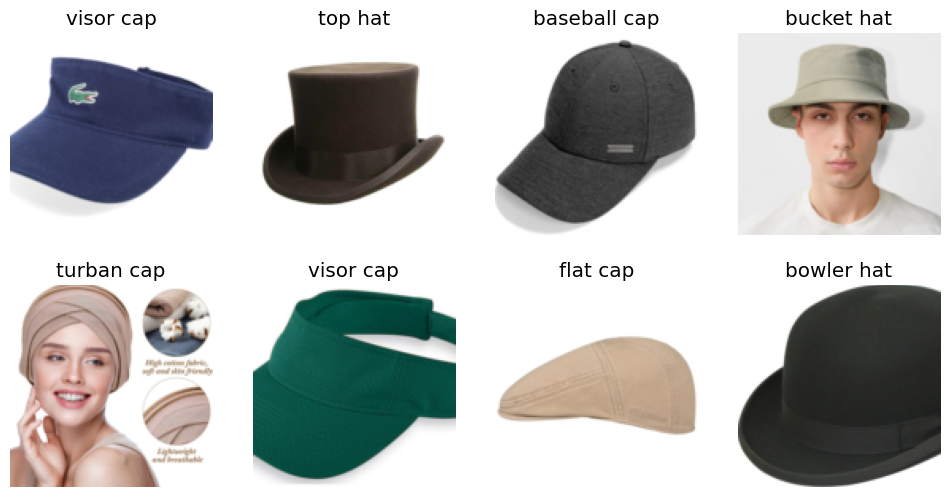

In [8]:
dls.train.show_batch(max_n=8, nrows=2)

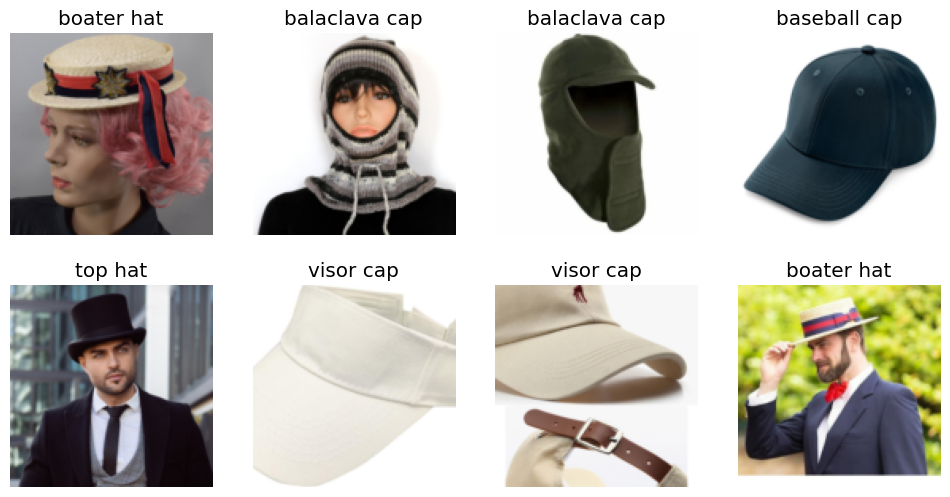

In [9]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

It is advisable to do data augmentation on GPU, here in this case, following code blocks are sample of how to do data augmentation  

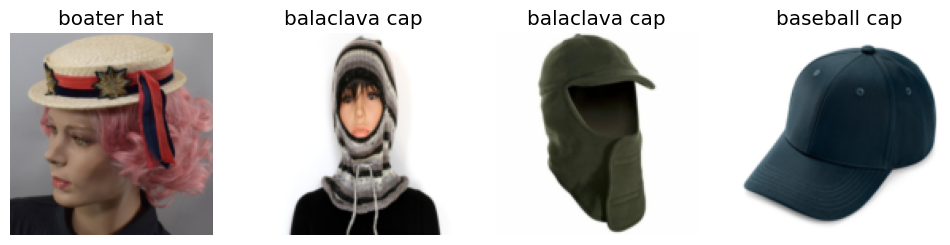

In [10]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

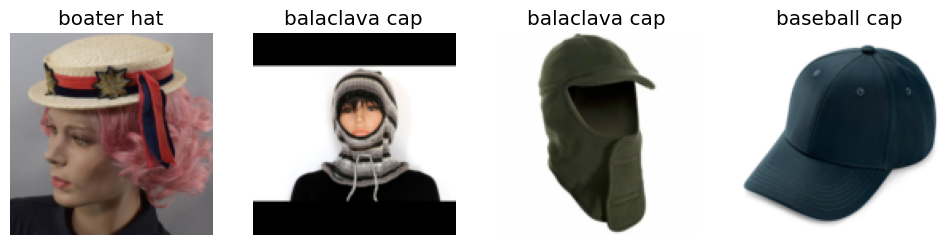

In [11]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

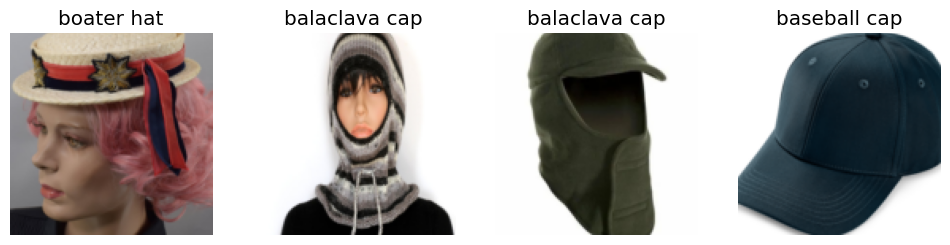

In [12]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [13]:
doc(aug_transforms)

,Type,Default,Details,
mult,float,1.0,"Multiplication applying to `max_rotate`,`max_lighting`,`max_warp`",
do_flip,bool,True,Random flipping,
flip_vert,bool,False,Flip vertically,
max_rotate,float,10.0,Maximum degree of rotation,
min_zoom,float,1.0,Minimum zoom,
max_zoom,float,1.1,Maximum zoom,
max_lighting,float,0.2,Maximum scale of changing brightness,
max_warp,float,0.2,Maximum value of changing warp per,
p_affine,float,0.75,Probability of applying affine transformation,
p_lighting,float,0.75,Probability of changing brightnest and contrast,


In [ ]:
from fastai.vision.all import aug_transforms
from fastcore.docments import docstring
print(docstring(aug_transforms))     # plain, nicely wrapped text
# or:
help(aug_transforms)                 # also wraps in Colab

Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.
Help on function aug_transforms in module fastai.vision.augment:

aug_transforms(mult: 'float' = 1.0, do_flip: 'bool' = True, flip_vert: 'bool' = False, max_rotate: 'float' = 10.0, min_zoom: 'float' = 1.0, max_zoom: 'float' = 1.1, max_lighting: 'float' = 0.2, max_warp: 'float' = 0.2, p_affine: 'float' = 0.75, p_lighting: 'float' = 0.75, xtra_tfms: 'list' = None, size: 'int | tuple' = None, mode: 'str' = 'bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)
    Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.



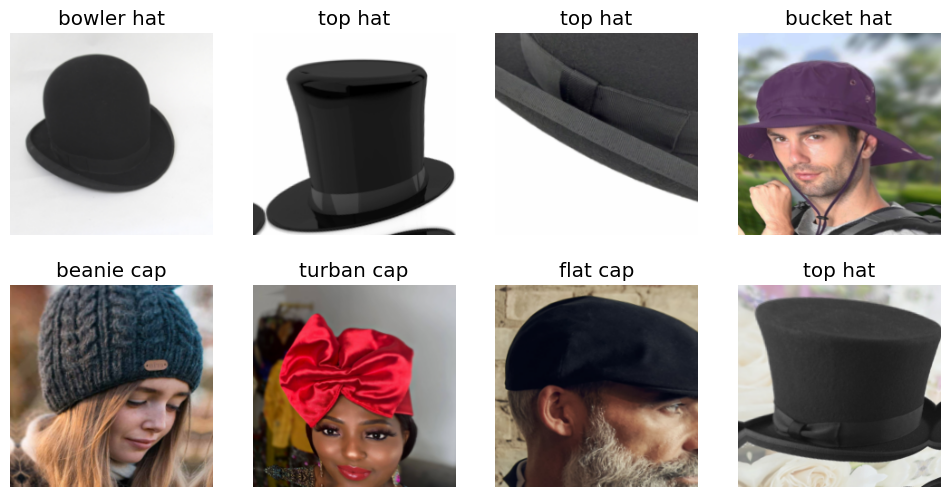

In [14]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
# saving augmented images
torch.save(dls, "data_loaders/cap_dataloader_v0.pkl")

# Testing Image Scraping with Selenium

NB: I tried to extract images from google and bing using selenium but it was not working in this Colab environment and I didn't tried in my local pc

In [1]:
# installing librarys
!pip install selenium
!apt update
!apt install chromium-chromedriver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.15.0
    Uninstalling typing_extensions-4.15.0:
      Successfully uninstalled typing_extensions-4.15.0
Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [80.2 kB]
Hit:8 https://ppa.launchpadcontent.net/dead

In [10]:
# importing Librarys
from selenium import webdriver
from selenium.webdriver.common.by import By  # By class provides us a set of methods that we can further use to locate web elements
from selenium.webdriver.common.keys import Keys
import time, os, requests
import pandas as pd
import time

In [2]:
# linking with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/2025_ALL_Master_Course_Works/ALL_DL_CV/CV-Project-1_Cap-Recognizer

/content/drive/MyDrive/2025_ALL_Master_Course_Works/ALL_DL_CV/CV-Project-1_Cap-Recognizer


In [11]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

In [12]:
# initializing web driver
driver = web_driver()

In [7]:
cap_labels = [
    "balaclava cap", "baseball cap", "beanie cap", "boater hat", "bowler hat",
    "bucket hat", "cowboy hat", "flat cap", "kepi cap", "taqiyah cap",
    "top hat", "turban cap", "visor cap"
]

In [15]:
# using google
def download_images(label, num_images=100, root_folder="dataset"):
    search_url = "https://www.google.com/imghp?hl=en"
    driver.get(search_url)
    time.sleep(1)

    # Search
    box = driver.find_element(By.NAME, "q")
    box.clear()
    box.send_keys(label)
    box.send_keys(Keys.RETURN)
    time.sleep(2)

    # Scroll until enough thumbnails are loaded
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        thumbnails = driver.find_elements(By.CSS_SELECTOR, "img.Q4LuWd")
        if len(thumbnails) >= num_images:
            break
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            try:
                driver.find_element(By.CSS_SELECTOR, ".mye4qd").click()  # "Load more" button
            except:
                break
        last_height = new_height

    # Create folder
    folder_path = os.path.join(root_folder, label.replace(" ", "_"))
    os.makedirs(folder_path, exist_ok=True)

    count = 0
    for thumb in thumbnails:
        try:
            driver.execute_script("arguments[0].scrollIntoView();", thumb)
            thumb.click()
            time.sleep(1.5)

            # Get full-size image
            images = driver.find_elements(By.CSS_SELECTOR, "img.n3VNCb")
            for img in images:
                src = img.get_attribute("src")
                if src and src.startswith("http"):
                    try:
                        img_data = requests.get(src, timeout=5).content
                        with open(f"{folder_path}/{label.replace(' ', '_')}_{count}.jpg", "wb") as f:
                            f.write(img_data)
                        count += 1
                        break
                    except:
                        continue
            if count >= num_images:
                break
        except:
            continue

    print(f"{label}: {count} images downloaded.")

In [17]:
# using bing
def download_images_bing(label, num_images=100, root_folder="dataset"):
    search_url = f"https://www.bing.com/images/search?q={label.replace(' ', '+')}&form=HDRSC2"
    driver.get(search_url)
    time.sleep(2)

    # Scroll until enough thumbnails are loaded
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        thumbnails = driver.find_elements(By.CSS_SELECTOR, "img.mimg")
        if len(thumbnails) >= num_images:
            break
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    # Create folder
    folder_path = os.path.join(root_folder, label.replace(" ", "_"))
    os.makedirs(folder_path, exist_ok=True)

    count = 0
    for thumb in thumbnails:
        try:
            src = thumb.get_attribute("src") or thumb.get_attribute("data-src")
            if src and src.startswith("http"):
                try:
                    img_data = requests.get(src, timeout=5).content
                    with open(f"{folder_path}/{label.replace(' ', '_')}_{count}.jpg", "wb") as f:
                        f.write(img_data)
                    count += 1
                except:
                    continue
        except:
            continue
        if count >= num_images:
            break

    print(f"{label}: {count} images downloaded.")

In [18]:
for label in cap_labels:
    download_images(label, num_images=100)

balaclava cap: 0 images downloaded.
baseball cap: 0 images downloaded.
beanie cap: 0 images downloaded.
boater hat: 0 images downloaded.
bowler hat: 0 images downloaded.
bucket hat: 0 images downloaded.
cowboy hat: 0 images downloaded.
flat cap: 0 images downloaded.
kepi cap: 0 images downloaded.
taqiyah cap: 0 images downloaded.
top hat: 0 images downloaded.
turban cap: 0 images downloaded.
visor cap: 0 images downloaded.
